## Dataset



MNIST data or the MNIST-fashion data, which is a drop-in replacement for MNIST (same size data format, same number of classes, same number of training and test examples). 

A more interesting choice would be CIFAR-10

In setting up the data, you should set up a training set and a test set. The test set should be large enough to give a reasonably accurate assessment of the error-rate (or loss) of your models: preferably at least 10,000 examples.

For the learning curve experiment (below), you will need to construct training sets of different sizes, with the largest at least 10 times the smallest. For the MNIST data, for example, your smallest training set might be 500, with sizes 500, 1000, 2000, 4000, 8000, 16000, 32000, and perhaps 60000 if you have time. (You get no extra marks for doing very long experiments.) 

## Model 

Pytorch model (you may find it helpful to keep it simple and fast to train). Train on an intermediate-sized dataset (if you are using MNIST, say 2000 or 4000). 


Plot the loss and error rate as a function of training epochs. 

Ensuring that model is complex enough to *overfit* the training data: that is the loss/error-rate on the training set should be below your target loss/error-rate, and the loss/error-rate on the validation set should be higher than this (preferably higher than your target error-rate). 

In [237]:
import numpy as np
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical   
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Example training images and their labels: [1, 2, 7, 8, 3]
Corresponding classes for the labels: ['automobile', 'bird', 'horse', 'ship', 'cat']


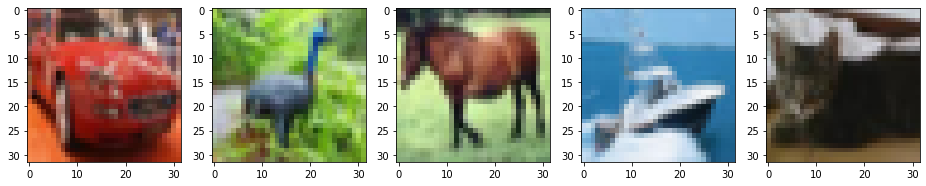

In [238]:
import matplotlib.pyplot as plt
cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[5:10]])) 
print('Corresponding classes for the labels: ' + str([cifar_classes[x[0]] for x in y_train[5:10]]))
f, axarr = plt.subplots(1, 5)
f.set_size_inches(16, 6)
for i in range(5):
    img = X_train[i+5]
    axarr[i].imshow(img)
plt.show()

In [239]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# factorizing the labels, rescaling the pixel data
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
x_train = X_train / 255
X_test = X_test / 255
# reducing the train size
X_train = x_train[0:20000]
y_train = y_train[0:20000]
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

(20000, 32, 32, 3)
(20000, 10)
Shape of test data:
(10000, 32, 32, 3)
(10000, 10)


In [240]:
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
# Model 1: Convolution Neural Network
def CNN(X_train, y_train, x_test, y_test, dropout):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # 1st Dropout layer
    if dropout:
        model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    # 2nd Dropout layer
    if dropout:
        model.add(Dropout(0.75))
    model.add(Dense(10, activation='softmax'))
    sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
    history = model.fit(X_train, y_train, batch_size=32, epochs=11, verbose=2, validation_data=(x_test,y_test))
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    print(model.metrics_names)
    print(score)
    return history
# Plot function for loss/error-rate
def plot_error(plot,model):  
    plt.plot(plot.history['loss'])
    plt.plot(plot.history['val_loss'])
    plt.title(model +' loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
    plt.show()

Epoch 1/11
625/625 - 34s - loss: 1.7342 - accuracy: 0.3701 - val_loss: 1.4773 - val_accuracy: 0.4600
Epoch 2/11
625/625 - 33s - loss: 1.2976 - accuracy: 0.5376 - val_loss: 1.2369 - val_accuracy: 0.5588
Epoch 3/11
625/625 - 33s - loss: 1.0599 - accuracy: 0.6272 - val_loss: 1.1586 - val_accuracy: 0.5912
Epoch 4/11
625/625 - 33s - loss: 0.8468 - accuracy: 0.6999 - val_loss: 1.1536 - val_accuracy: 0.6054
Epoch 5/11
625/625 - 33s - loss: 0.6105 - accuracy: 0.7828 - val_loss: 1.2612 - val_accuracy: 0.6061
Epoch 6/11
625/625 - 33s - loss: 0.3960 - accuracy: 0.8619 - val_loss: 1.2977 - val_accuracy: 0.6059
Epoch 7/11
625/625 - 33s - loss: 0.2529 - accuracy: 0.9133 - val_loss: 1.6065 - val_accuracy: 0.6050
Epoch 8/11
625/625 - 33s - loss: 0.1691 - accuracy: 0.9431 - val_loss: 1.9915 - val_accuracy: 0.5995
Epoch 9/11
625/625 - 33s - loss: 0.1206 - accuracy: 0.9589 - val_loss: 2.1117 - val_accuracy: 0.5980
Epoch 10/11
625/625 - 33s - loss: 0.1044 - accuracy: 0.9650 - val_loss: 2.3113 - val_accura

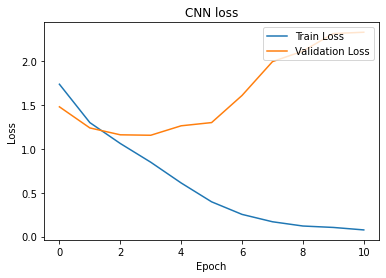

In [241]:
CNN_plot = CNN(X_train, y_train, X_test, y_test, dropout = False)
plot_error(CNN_plot, "CNN")

Regularization is used to reduce the error by fitting function appropriately on given training set and avoids overfitting and we can see the drop of around 50% in loss/error-rate


Now select a type of regularisation (which may be L2, or dropout) and train your initial model with different amounts of regularisation. 

For L2 regularisation, compare 0 regularisation with very small amounts of regularisation -- try 0.0001, 0.001, 0.01, and see for what level of L2 regularisation there starts to be an effect. 

A small amount of regularisation may improve the validation set performance of your overfitted model; too much regularisation may make performance on the validation set worse. 

Train your model multiple times, applying different amounts of regularisation, and plot a graph showing the effect of different amounts of regularisation. 

Plot the amount of regularisation along the x axis, and the validation set performance (loss/error-rate) on the y axis.  How does regularisation affect the performance of your initial network, and what is the optimal amount? 

Epoch 1/11
625/625 - 35s - loss: 2.0340 - accuracy: 0.2463 - val_loss: 1.7161 - val_accuracy: 0.3896
Epoch 2/11
625/625 - 32s - loss: 1.7321 - accuracy: 0.3625 - val_loss: 1.5337 - val_accuracy: 0.4684
Epoch 3/11
625/625 - 34s - loss: 1.6043 - accuracy: 0.4093 - val_loss: 1.3841 - val_accuracy: 0.5005
Epoch 4/11
625/625 - 34s - loss: 1.5152 - accuracy: 0.4505 - val_loss: 1.3421 - val_accuracy: 0.5238
Epoch 5/11
625/625 - 35s - loss: 1.4552 - accuracy: 0.4780 - val_loss: 1.2838 - val_accuracy: 0.5354
Epoch 6/11
625/625 - 33s - loss: 1.3912 - accuracy: 0.4963 - val_loss: 1.2869 - val_accuracy: 0.5498
Epoch 7/11
625/625 - 34s - loss: 1.3478 - accuracy: 0.5106 - val_loss: 1.2559 - val_accuracy: 0.5466
Epoch 8/11
625/625 - 34s - loss: 1.3086 - accuracy: 0.5296 - val_loss: 1.1989 - val_accuracy: 0.5720
Epoch 9/11
625/625 - 32s - loss: 1.2665 - accuracy: 0.5455 - val_loss: 1.1619 - val_accuracy: 0.5782
Epoch 10/11
625/625 - 33s - loss: 1.2218 - accuracy: 0.5622 - val_loss: 1.1490 - val_accura

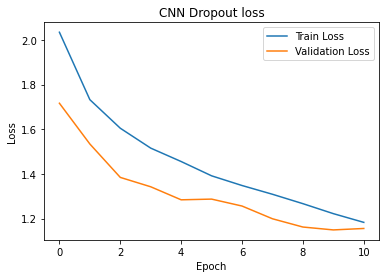

In [242]:
CNN_plot = CNN(X_train, y_train, X_test, y_test, dropout = True)
plot_error(CNN_plot, "CNN Dropout")


Now train your model (with the amount of regularisation you selected) on different amounts of training data. 

Plot the performance (loss/error-rate) of the model on the validation set against the size of the training set. 
This is typically best done on a log-log plot. 

Describe the approximate relationship between the training set size and loss / error-rate.  Does the network performance appear to improve as some power of the amount of data in the training set?  If so, by what power ? 

For example, a very good rate of improvement is for error-rate to be proportional to $\dfrac{1}{\sqrt{n}}$ where $n$ is the training set size.  For your model, the rate of improvement of validation error with training set size may not be as fast as this (or it may, who knows?)  The aim of this exercise is to find out what it actually is. 

In [ ]:
train_size = [500, 1000, 2000, 4000, 8000]  
cnn_plots = []
for i in range(5):
    hist = CNN(x_train[0:train_size[i]],y_train[0:train_size[i]], X_test, y_test, True)
    cnn_plots.append(hist)

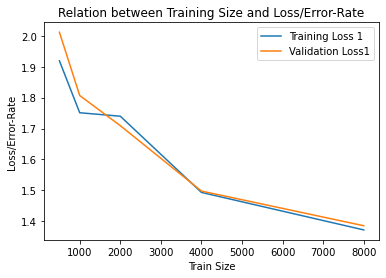

In [244]:
def plot_learning_curve(a, train_size):
    n1 = []
    loss = []
    val = []
    for i in range(len(train_size)):   
        n1.append("Training Loss "+str(i+1))
        n1.append("Validation Loss"+str(i+1))
        loss.append(a[i].history['loss'][-1])
        val.append(a[i].history['val_loss'][-1])
    plt.plot(train_size,loss)
    plt.plot(train_size,val) 
    plt.legend(n1, loc='upper right')
    plt.title('Relation between Training Size and Loss/Error-Rate')
    plt.ylabel('Loss/Error-Rate')
    plt.xlabel('Train Size')
    plt.show()

plot_learning_curve(cnn_plots, train_size)

As training size increases, loss/error-rate exponentially  


Devise what you believe to be a better neural network architecture for the problem (e.g. for MNIST you might use a fully-connected network for your initial model, and then try a convolutional net for your second model).

Repeat sections 2 (regularisation experiment), and determine whether it has better validation set performance than the first model, for an intermediate size of training set (e.g. 2000 or 4000 for the MNIST data). 

Repeat section 3. Does your model have a different learning curve from the first? Plot the learning curves for the first and second model on the same graph, to compare them. Comment: is there a more rapid reduction of error-rate with training set size for your second model?  

In [245]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
X_train = np.reshape(X_train,(50000,3072))
X_test = np.reshape(X_test,(10000,3072))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255
X_test = X_test / 255
# reducing the train size
X_train = X_train[0:20000]
y_train = y_train[0:20000]

In [246]:
def MLP(X_train, y_train, x_test, y_test, dropout):
    model = Sequential()
    model.add(Dense(256, activation='relu', input_dim=3072))
    model.add(Dense(256, activation='relu'))
    # 1st Dropout layer
    if dropout:
        model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    # 2nd Dropout layer
    if dropout:
        model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train,y_train, epochs=30, batch_size=128, verbose=2, validation_data=(x_test,y_test))
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    print(model.metrics_names)
    print(score)
    return history

Epoch 1/30
157/157 - 2s - loss: 1.9509 - accuracy: 0.2919 - val_loss: 1.9193 - val_accuracy: 0.2909
Epoch 2/30
157/157 - 2s - loss: 1.7414 - accuracy: 0.3774 - val_loss: 1.7044 - val_accuracy: 0.3886
Epoch 3/30
157/157 - 2s - loss: 1.6510 - accuracy: 0.4065 - val_loss: 1.6475 - val_accuracy: 0.4121
Epoch 4/30
157/157 - 2s - loss: 1.5857 - accuracy: 0.4358 - val_loss: 1.6609 - val_accuracy: 0.4034
Epoch 5/30
157/157 - 2s - loss: 1.5386 - accuracy: 0.4547 - val_loss: 1.5827 - val_accuracy: 0.4400
Epoch 6/30
157/157 - 2s - loss: 1.4962 - accuracy: 0.4737 - val_loss: 1.6616 - val_accuracy: 0.4143
Epoch 7/30
157/157 - 2s - loss: 1.4521 - accuracy: 0.4811 - val_loss: 1.6329 - val_accuracy: 0.4183
Epoch 8/30
157/157 - 2s - loss: 1.4206 - accuracy: 0.4940 - val_loss: 1.5170 - val_accuracy: 0.4550
Epoch 9/30
157/157 - 2s - loss: 1.3880 - accuracy: 0.5070 - val_loss: 1.5435 - val_accuracy: 0.4515
Epoch 10/30
157/157 - 2s - loss: 1.3582 - accuracy: 0.5171 - val_loss: 1.5621 - val_accuracy: 0.4412

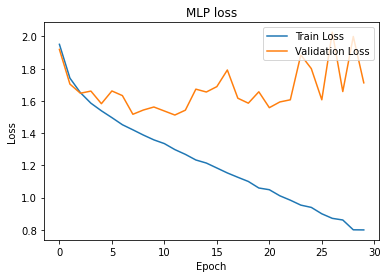

In [247]:
MLP_plot = MLP(X_train, y_train, X_test, y_test, dropout = False)
plot_error(MLP_plot, "MLP")

### With dropout

Epoch 1/30
157/157 - 3s - loss: 2.1101 - accuracy: 0.2062 - val_loss: 1.9348 - val_accuracy: 0.2984
Epoch 2/30
157/157 - 2s - loss: 1.9198 - accuracy: 0.2986 - val_loss: 1.8134 - val_accuracy: 0.3546
Epoch 3/30
157/157 - 2s - loss: 1.8264 - accuracy: 0.3417 - val_loss: 1.7773 - val_accuracy: 0.3539
Epoch 4/30
157/157 - 2s - loss: 1.7734 - accuracy: 0.3611 - val_loss: 1.6927 - val_accuracy: 0.3926
Epoch 5/30
157/157 - 2s - loss: 1.7243 - accuracy: 0.3798 - val_loss: 1.8853 - val_accuracy: 0.3261
Epoch 6/30
157/157 - 2s - loss: 1.6912 - accuracy: 0.3933 - val_loss: 1.6742 - val_accuracy: 0.4027
Epoch 7/30
157/157 - 2s - loss: 1.6556 - accuracy: 0.4092 - val_loss: 1.6434 - val_accuracy: 0.4053
Epoch 8/30
157/157 - 2s - loss: 1.6261 - accuracy: 0.4187 - val_loss: 1.7293 - val_accuracy: 0.3725
Epoch 9/30
157/157 - 2s - loss: 1.6049 - accuracy: 0.4245 - val_loss: 1.5643 - val_accuracy: 0.4378
Epoch 10/30
157/157 - 4s - loss: 1.5706 - accuracy: 0.4378 - val_loss: 1.5714 - val_accuracy: 0.4302

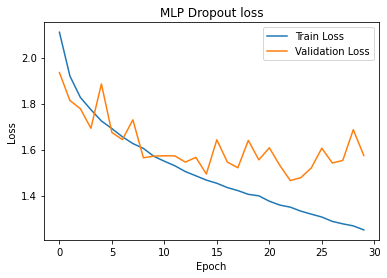

In [248]:
MLP_plot = MLP(X_train, y_train, X_test, y_test, dropout = True)
plot_error(MLP_plot, "MLP Dropout")

While observing the two graphs and after regularization we can see a better validation performance by 8% drop

### Learning Curve

In [ ]:
mlp_plots = [] 
for i in range(5):
    hist = MLP(X_train[0:train_size[i]],y_train[0:train_size[i]], X_test, y_test, True)
    mlp_plots.append(hist)

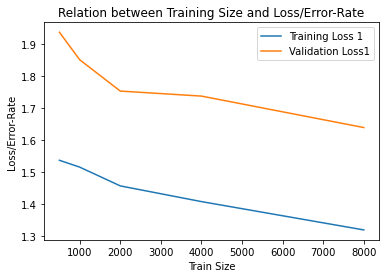

In [250]:
plot_learning_curve(mlp_plots, train_size)

Exponentially we can observe there is rapid reduction of error-rate with training set size for my second model in cifar dataset 

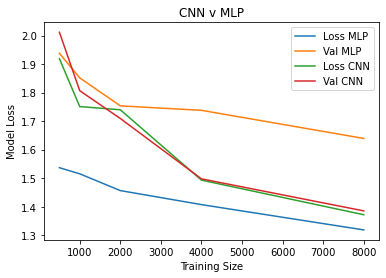

In [252]:
loss_mlp = []
loss_cnn = []
val_mlp = []
val_cnn = []
for i in range(len(train_size)):
    loss_cnn.append(cnn_plots[i].history['loss'][-1])
    val_cnn.append(cnn_plots[i].history['val_loss'][-1])
    loss_mlp.append(mlp_plots[i].history['loss'][-1])
    val_mlp.append(mlp_plots[i].history['val_loss'][-1])
plt.plot(train_size, loss_mlp)
plt.plot(train_size, val_mlp)
plt.plot(train_size, loss_cnn)
plt.plot(train_size, val_cnn)
plt.title('CNN v MLP')
plt.ylabel('Model Loss')
plt.xlabel('Training Size')
plt.legend(['Loss MLP', 'Val MLP','Loss CNN', 'Val CNN'], loc='best')
plt.show()

Yes, there is more rapid reduction of error-rate with training set size for your second model exponentially